In [1]:
import pandas as pd
import matplotlib as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import os

In [2]:
df = pd.read_csv("adult 3.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df.replace("?", "Unknown", inplace=True)

In [6]:
df = df[df["workclass"] != "Without-pay"]
df = df[df["workclass"] != "Never-worked"]
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [7]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.shape

(48811, 15)

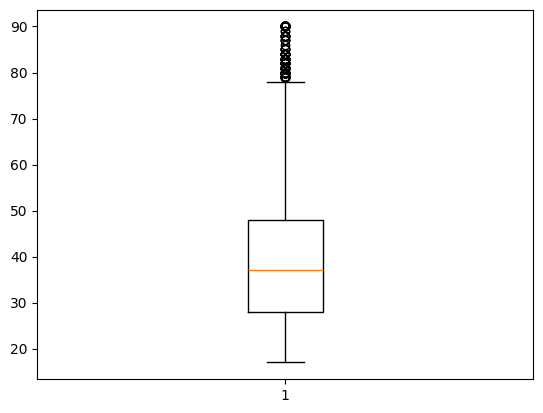

In [10]:
import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['age'])
plt.show()

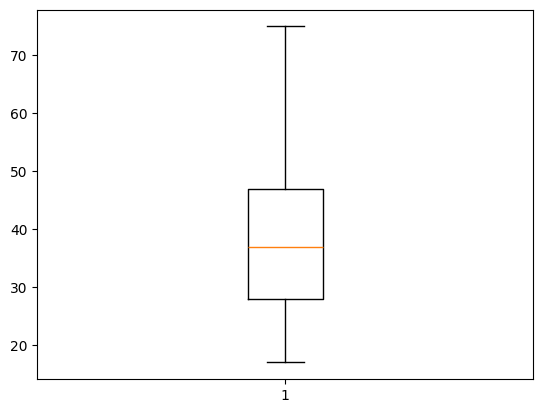

In [11]:
df=df[(df['age']<=75)&(df['age']>=17)]
plt.boxplot(df['age'])
plt.show()

In [12]:
df.shape

(48438, 15)

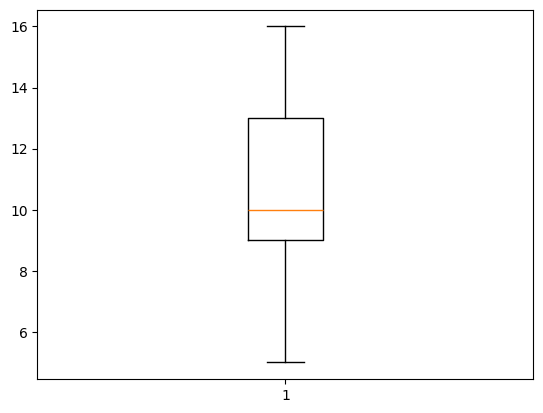

In [13]:
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]
plt.boxplot(df['educational-num'])
plt.show()

In [14]:
df.shape

(46720, 15)

In [15]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=["income"])
y = df["income"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Save model and tools
os.makedirs("models", exist_ok=True)
joblib.dump(model, "best_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(label_encoders, "models/label_encoders.pkl")
joblib.dump(X.columns.tolist(), "models/feature_columns.pkl")
print("✅ All artifacts saved.")

Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7010
           1       0.78      0.60      0.68      2334

    accuracy                           0.86      9344
   macro avg       0.83      0.77      0.79      9344
weighted avg       0.85      0.86      0.85      9344

✅ All artifacts saved.


In [19]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained components
model = joblib.load("best_model.pkl")
scaler = joblib.load("models/scaler.pkl")
label_encoders = joblib.load("models/label_encoders.pkl")
feature_columns = joblib.load("models/feature_columns.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")
st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs
st.sidebar.header("Input Employee Details")
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", label_encoders["education"].classes_)
occupation = st.sidebar.selectbox("Job Role", label_encoders["occupation"].classes_)
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
relationship = st.sidebar.selectbox("Relationship", label_encoders["relationship"].classes_)
race = st.sidebar.selectbox("Race", label_encoders["race"].classes_)
gender = st.sidebar.selectbox("Gender", label_encoders["gender"].classes_)
native_country = st.sidebar.selectbox("Native Country", label_encoders["native-country"].classes_)
marital_status = st.sidebar.selectbox("Marital Status", label_encoders["marital-status"].classes_)
capital_gain = st.sidebar.number_input("Capital Gain", 0)
capital_loss = st.sidebar.number_input("Capital Loss", 0)
educational_num = st.sidebar.slider("Education Number", 1, 16, 10)
workclass = st.sidebar.selectbox("Workclass", label_encoders["workclass"].classes_)

# Create input dictionary
input_dict = {
    "age": age,
    "workclass": label_encoders["workclass"].transform([workclass])[0],
    "marital-status": label_encoders["marital-status"].transform([marital_status])[0],
    "occupation": label_encoders["occupation"].transform([occupation])[0],
    "relationship": label_encoders["relationship"].transform([relationship])[0],
    "race": label_encoders["race"].transform([race])[0],
    "gender": label_encoders["gender"].transform([gender])[0],
    "native-country": label_encoders["native-country"].transform([native_country])[0],
    "hours-per-week": hours_per_week,
    "capital-gain": capital_gain,
    "capital-loss": capital_loss,
    "educational-num": educational_num,
    "education": label_encoders["education"].transform([education])[0]
}

input_df = pd.DataFrame([input_dict])
input_df = input_df.reindex(columns=feature_columns, fill_value=0)
input_scaled = scaler.transform(input_df)

# Show input
st.write("### 🔎 Model Input Preview")
st.write(input_df)

# Predict
if st.button("Predict Salary Class"):
    prediction = model.predict(input_scaled)[0]
    label = ">50K" if prediction == 1 else "≤50K"
    st.success(f"✅ Predicted Salary Class: **{label}**")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV for prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    for col in label_encoders:
        if col in batch_data.columns:
            batch_data[col] = label_encoders[col].transform(batch_data[col])
    batch_data = batch_data.reindex(columns=feature_columns, fill_value=0)
    batch_scaled = scaler.transform(batch_data)
    batch_preds = model.predict(batch_scaled)
    batch_data["PredictedClass"] = [">50K" if p == 1 else "≤50K" for p in batch_preds]
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode("utf-8")
    st.download_button("Download Results", csv, "predicted_classes.csv", mime="text/csv")

Overwriting app.py


In [ ]:
!streamlit run app.py